In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams["figure.figsize"] = 20 , 4

In [2]:
from AJ_ML_Library import models_classification

/Users/zhanghsiungwei/anaconda/envs/tensor/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/zhanghsiungwei/anaconda/envs/tensor/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
train = pd.read_csv("data/train_modified_1.csv")
test = pd.read_csv("data/test_modified_1.csv")

In [5]:
train.shape , test.shape

((7381, 187), (11171, 186))

In [6]:
train.columns

Index([u'fault_severity', u'id', u'location', u'event_type 10',
       u'event_type 11', u'event_type 13', u'event_type 14', u'event_type 15',
       u'event_type 18', u'event_type 2',
       ...
       u'resource_type 7', u'resource_type 8', u'resource_type 9',
       u'severity_type 1', u'severity_type 2', u'severity_type 3',
       u'severity_type 4', u'severity_type 5', u'location_counts',
       u'feature_count'],
      dtype='object', length=187)

In [7]:
train["fault_severity"].value_counts()

0.0    4784
1.0    1871
2.0     726
Name: fault_severity, dtype: int64

In [8]:
target = "fault_severity"
IDcol = "id"
output_colnames = ["predict_0" , "predict_1" , "predict_2"]

In [9]:
train["source"] = "train"
test["source"] = "test"

In [10]:
data = pd.concat([train , test] , ignore_index=True)

In [11]:
help(pd.concat)

Help on function concat in module pandas.core.reshape.concat:

concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, copy=True)
    Concatenate pandas objects along a particular axis with optional set logic
    along the other axes.
    
    Can also add a layer of hierarchical indexing on the concatenation axis,
    which may be useful if the labels are the same (or overlapping) on
    the passed axis number.
    
    Parameters
    ----------
    objs : a sequence or mapping of Series, DataFrame, or Panel objects
        If a dict is passed, the sorted keys will be used as the `keys`
        argument, unless it is passed, in which case the values will be
        selected (see below). Any None objects will be dropped silently unless
        they are all None in which case a ValueError will be raised
    axis : {0/'index', 1/'columns'}, default 0
        The axis to concatenate along
    join : {'inner', 'oute

In [12]:
data.shape

(18552, 188)

## Create New Features

In [14]:
feat_pred = [x for x in data.columns if x.startswith("feature ")]
len(feat_pred)

131

In [16]:
# create log features
for f in feat_pred:
    data[f] = data[f].apply(lambda x: np.log(x+1))

In [17]:
sum(data["location_counts"]<2)

169

In [18]:
data["location"].value_counts()

832     184
121     184
929     183
157     177
917     168
799     163
11      162
742     161
776     153
897     151
23      148
60      146
155     144
943     142
684     136
153     134
1085    131
864     130
286     129
1121    124
902     124
114     123
288     121
1100    114
698     110
956     109
24      109
49      106
955     101
540     100
       ... 
1092      1
1060      1
814       1
170       1
846       1
234       1
878       1
442       1
340       1
324       1
276       1
260       1
212       1
634       1
483       1
1107      1
1075      1
666       1
1118      1
851       1
47        1
787       1
794       1
723       1
707       1
826       1
627       1
890       1
515       1
1119      1
Name: location, Length: 1126, dtype: int64

In [86]:
def create_location_count(features):
    for feat in features:
        if feat in data.columns:
            loc_count = data.pivot_table(values=feat , index = "location" , aggfunc = lambda x:sum(x>0))
            #print loc_count
            #print loc_count.iloc[148]
            data["loc_count_%s"%feat] = data["location"].apply(lambda x: loc_count.iloc[x])
        else:
            print "%s is not feature in data" % feat

In [87]:
def create_location_stats(features):
    for feat in features:
        loc_mean = data.pivot_table(values = feat , index = "location" , aggfunc=lambda x:np.mean([i for i in x if i>0]) if sum(x>0)>0 else 0)
        data["loc_mean_%s"%feat] = data["location"].apply(lambda x:loc_mean.iloc[x])

In [21]:
feat_pred

['feature 101',
 'feature 103',
 'feature 105',
 'feature 109',
 'feature 118',
 'feature 132',
 'feature 133',
 'feature 134',
 'feature 135',
 'feature 153',
 'feature 154',
 'feature 155',
 'feature 157',
 'feature 160',
 'feature 161',
 'feature 163',
 'feature 167',
 'feature 170',
 'feature 171',
 'feature 172',
 'feature 179',
 'feature 181',
 'feature 182',
 'feature 188',
 'feature 191',
 'feature 193',
 'feature 195',
 'feature 196',
 'feature 197',
 'feature 198',
 'feature 20',
 'feature 201',
 'feature 202',
 'feature 203',
 'feature 204',
 'feature 205',
 'feature 206',
 'feature 207',
 'feature 209',
 'feature 211',
 'feature 212',
 'feature 217',
 'feature 218',
 'feature 219',
 'feature 220',
 'feature 221',
 'feature 222',
 'feature 223',
 'feature 227',
 'feature 228',
 'feature 229',
 'feature 230',
 'feature 231',
 'feature 232',
 'feature 233',
 'feature 234',
 'feature 235',
 'feature 236',
 'feature 239',
 'feature 240',
 'feature 273',
 'feature 276',
 'feature

In [22]:
log_feature = pd.read_csv("data/log_feature.csv")

In [23]:
log_feature.head()

,id,log_feature,volume
0,6597,feature 68,6
1,8011,feature 68,7
2,2597,feature 68,1
3,5022,feature 172,2
4,5022,feature 56,1


In [24]:
log_feature["log_feature"].value_counts()

feature 312    5267
feature 232    4754
feature 82     3472
feature 203    2823
feature 313    2145
feature 233    1901
feature 307    1597
feature 54     1573
feature 170    1526
feature 71     1514
feature 315    1495
feature 134    1419
feature 80     1336
feature 235    1294
feature 193    1160
feature 219    1152
feature 68     1093
feature 227    1080
feature 314     950
feature 201     902
feature 234     882
feature 73      868
feature 195     783
feature 301     707
feature 309     627
feature 55      564
feature 229     560
feature 273     491
feature 308     484
feature 368     462
               ... 
feature 16        1
feature 271       1
feature 175       1
feature 272       1
feature 263       1
feature 254       1
feature 257       1
feature 250       1
feature 252       1
feature 382       1
feature 386       1
feature 385       1
feature 96        1
feature 3         1
feature 144       1
feature 260       1
feature 262       1
feature 17        1
feature 379       1


In [25]:
model_detail = pd.read_csv("ensemble/xgboost_models.csv")

In [26]:
model_detail.dtypes

ModelID                         int64
Accuracy                      float64
CVScore_mean                  float64
CVScore_std                   float64
SpecifiedMetric               float64
ActualScore (manual entry)    float64
CVMethod                       object
ConfusionMatrix                object
Predictors                     object
ScoringMetric                 float64
AUC                           float64
base_score                    float64
colsample_bylevel               int64
colsample_bytree              float64
gamma                           int64
learning_rate                 float64
max_delta_step                  int64
max_depth                       int64
min_child_weight                int64
missing                         int64
n_estimators                    int64
nthread                         int64
objective                      object
reg_alpha                       int64
reg_lambda                      int64
scale_pos_weight                int64
seed        

In [27]:
model_detail["Feature_Importance"]

0    location               3294\nfeature_count    ...
1    location               32642\nfeature_count   ...
Name: Feature_Importance, dtype: object

In [29]:
print model_detail["Feature_Importance"][1]

location               32642
feature_count          27846
location_counts        26110
feature 82             10954
feature 203             9905
feature 170             3759
feature 71              3511
feature 54              3199
feature 80              3178
feature 201             2935
feature 193             2695
feature 68              2277
event_type 11           2276
feature 232             2252
severity_type 1         2220
feature 312             2169
feature 307             1583
feature 202             1509
feature others_1        1502
feature others_0        1470
feature 73              1237
resource_type 2         1208
event_type 54           1096
feature 227             1092
feature 283             1011
feature 368              970
feature 313              943
feature 55               939
feature 291              903
event_type 35            867
feature others_2         850
feature 81               832
severity_type 2          801
feature 179              778
event_type 15 

In [33]:
new_feat = model_detail["Feature_Importance"][1].split("\n")

In [35]:
new_feat[3:20]

['feature 82             10954',
 'feature 203             9905',
 'feature 170             3759',
 'feature 71              3511',
 'feature 54              3199',
 'feature 80              3178',
 'feature 201             2935',
 'feature 193             2695',
 'feature 68              2277',
 'event_type 11           2276',
 'feature 232             2252',
 'severity_type 1         2220',
 'feature 312             2169',
 'feature 307             1583',
 'feature 202             1509',
 'feature others_1        1502',
 'feature others_0        1470']

In [39]:
new_feat = [" ".join(x.split()[:2]) for x in new_feat[3:20]]

In [88]:
create_location_count(new_feat)

In [64]:
ll = data.pivot_table(values="feature 82" , index = "location" , aggfunc=lambda x:sum(x>0))

In [71]:
ll.shape

(1126, 1)

In [83]:
data["location"].unique()

array([ 148, 1027,  186, ...,  662,  825,  112])

In [79]:
ll.dtypes

feature 82    float64
dtype: object

In [89]:
ll.iloc[186]

feature 82    0.0
Name: 186, dtype: float64

In [90]:
create_location_stats(new_feat)

In [91]:
print data[[u'loc_mean_feature 80', u'loc_mean_feature 71', u'loc_mean_feature 193',
       u'loc_mean_feature 312']].head()

   loc_mean_feature 80  loc_mean_feature 71  loc_mean_feature 193  \
0             0.000000                  0.0                   0.0   
1             0.000000                  0.0                   0.0   
2             0.000000                  0.0                   0.0   
3             1.585072                  0.0                   0.0   
4             0.000000                  0.0                   0.0   

   loc_mean_feature 312  
0              2.750371  
1              1.711339  
2              0.881157  
3              0.000000  
4              0.751071  


In [92]:
data[[u'loc_count_feature 203', u'loc_count_feature 82',
       u'loc_count_event_type 11', u'loc_count_severity_type 1',
       u'loc_count_feature 170', u'loc_count_feature 54']].head()

,loc_count_feature 203,loc_count_feature 82,loc_count_event_type 11,loc_count_severity_type 1,loc_count_feature 170,loc_count_feature 54
0,0.0,0.0,3,11,0.0,0.0
1,0.0,0.0,0,3,0.0,0.0
2,0.0,0.0,0,1,0.0,0.0
3,42.0,49.0,43,44,0.0,0.0
4,0.0,0.0,2,4,0.0,0.0


In [94]:
data["id"].head()

0    14121
1     9320
2    14394
3     8218
4    14804
Name: id, dtype: int64

In [95]:
data = data.sort_values("id")

In [96]:
data["id"].head()

4407     1
12494    2
11574    3
12210    4
5694     5
Name: id, dtype: int64

In [98]:
data["id"]

4407         1
12494        2
11574        3
12210        4
5694         5
279          6
9752         7
4370         8
10951        9
16106       10
11290       11
8079        12
2199        13
8794        14
7904        15
12396       16
11782       17
13528       18
500         19
4591        20
8996        21
7812        22
4829        23
7051        24
15205       25
5446        26
4368        27
4313        28
5763        29
15310       30
         ...  
8010     18523
2051     18524
6804     18525
18504    18526
3991     18527
7278     18528
9445     18529
2964     18530
16961    18531
17286    18532
4641     18533
13448    18534
492      18535
1223     18536
2324     18537
5944     18538
847      18539
12786    18540
12394    18541
3312     18542
7020     18543
9991     18544
14949    18545
8821     18546
16199    18547
4612     18548
9297     18549
1966     18550
12575    18551
7827     18552
Name: id, Length: 18552, dtype: int64

## Create Pattern

In [100]:
le = LabelEncoder()

In [101]:
feat_pred

['feature 101',
 'feature 103',
 'feature 105',
 'feature 109',
 'feature 118',
 'feature 132',
 'feature 133',
 'feature 134',
 'feature 135',
 'feature 153',
 'feature 154',
 'feature 155',
 'feature 157',
 'feature 160',
 'feature 161',
 'feature 163',
 'feature 167',
 'feature 170',
 'feature 171',
 'feature 172',
 'feature 179',
 'feature 181',
 'feature 182',
 'feature 188',
 'feature 191',
 'feature 193',
 'feature 195',
 'feature 196',
 'feature 197',
 'feature 198',
 'feature 20',
 'feature 201',
 'feature 202',
 'feature 203',
 'feature 204',
 'feature 205',
 'feature 206',
 'feature 207',
 'feature 209',
 'feature 211',
 'feature 212',
 'feature 217',
 'feature 218',
 'feature 219',
 'feature 220',
 'feature 221',
 'feature 222',
 'feature 223',
 'feature 227',
 'feature 228',
 'feature 229',
 'feature 230',
 'feature 231',
 'feature 232',
 'feature 233',
 'feature 234',
 'feature 235',
 'feature 236',
 'feature 239',
 'feature 240',
 'feature 273',
 'feature 276',
 'feature

### 1. Pattern based on features

In [102]:
data[feat_pred].apply(lambda x: map(str , x.values))

,feature 101,feature 103,feature 105,feature 109,feature 118,feature 132,feature 133,feature 134,feature 135,feature 153,...,feature 82,feature 83,feature 85,feature 86,feature 87,feature 94,feature 95,feature others_0,feature others_1,feature others_2
4407,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5694,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10951,0.0,0.0,3.52636052462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.77258872224,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
data["pattern_feature"] = data[feat_pred].apply(lambda x: "".join(map(str , x.values)) , axis = 1)

In [104]:
data["pattern_feature"]

4407     0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00...
12494    0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00...
11574    0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00...
12210    0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00...
5694     0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00...
279      0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00...
9752     0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00...
4370     0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00...
10951    0.00.03.526360524620.00.00.00.00.00.00.00.00.0...
16106    0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00...
11290    0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00...
8079     0.00.00.00.00.00.00.00.693147180560.00.00.00.0...
2199     0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00...
8794     0.00.00.00.00.00.01.098612288670.00.00.00.00.0...
7904     0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00...
12396    0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00...
11782    0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00.

In [105]:
data["pattern_feature"] = le.fit_transform(data["pattern_feature"])

In [107]:
data["pattern_feature"].shape

(18552,)

In [108]:
len(data["pattern_feature"].unique())

9581

In [109]:
sum(data["pattern_feature"].value_counts() > 5)

380

In [110]:
pattern_feature_count = data["pattern_feature"].value_counts()

In [111]:
data["pattern_feature_count"] = data["pattern_feature"].apply(lambda x: pattern_feature_count[x])

### 2. Pattern based on features+severity_type+event+resource

In [113]:
severity_pred = [x for x in data.columns if x.startswith("severity_type ")]

In [114]:
event_pred = [x for x in data.columns if x.startswith("event_type ")]

In [115]:
resource_pred = [x for x in data.columns if x.startswith("resource_type ")]

In [116]:
fser_pred = feat_pred + severity_pred + event_pred + resource_pred

In [117]:
len(fser_pred)

182

In [122]:
print severity_pred
print event_pred
print resource_pred

['severity_type 1', 'severity_type 2', 'severity_type 3', 'severity_type 4', 'severity_type 5']
['event_type 10', 'event_type 11', 'event_type 13', 'event_type 14', 'event_type 15', 'event_type 18', 'event_type 2', 'event_type 20', 'event_type 21', 'event_type 22', 'event_type 23', 'event_type 24', 'event_type 26', 'event_type 27', 'event_type 28', 'event_type 29', 'event_type 30', 'event_type 32', 'event_type 34', 'event_type 35', 'event_type 40', 'event_type 42', 'event_type 43', 'event_type 44', 'event_type 45', 'event_type 46', 'event_type 47', 'event_type 5', 'event_type 50', 'event_type 54', 'event_type 6', 'event_type 7', 'event_type 8', 'event_type others_0', 'event_type others_1', 'event_type others_2']
['resource_type 1', 'resource_type 10', 'resource_type 2', 'resource_type 3', 'resource_type 4', 'resource_type 5', 'resource_type 6', 'resource_type 7', 'resource_type 8', 'resource_type 9']


In [123]:
data["pattern_event"] = data[event_pred].apply(lambda x: "".join(map(str , x.values)) , axis = 1)

In [126]:
len(data["pattern_event"][0])

36

In [127]:
len(event_pred)

36

In [131]:
data["pattern_event_count"].shape

(18552,)

In [128]:
data["pattern_event"] = le.fit_transform(data["pattern_event"])

pattern_event_count = data["pattern_event"].value_counts()

data["pattern_event_count"] = data["pattern_event"].apply(lambda x: pattern_event_count[x])

In [132]:
data["pattern_resource"] = data[resource_pred].apply(lambda x: "".join(map(str , x.values)) , axis = 1)
data["pattern_resource"] = le.fit_transform(data["pattern_resource"])
pattern_resource_count = data["pattern_resource"].value_counts()
data["pattern_resource_count"] = data["pattern_resource"].apply(lambda x: pattern_resource_count[x])

In [133]:
data["pattern_all"] = data[fser_pred].apply(lambda x: "".join(map(str , x.values)) , axis = 1)
data["pattern_all"] = le.fit_transform(data["pattern_all"])
pattern_all_count = data["pattern_all"].value_counts()
data["pattern_all_count"] = data["pattern_all"].apply(lambda x: pattern_all_count[x])

In [134]:
data["pattern_all"].shape

(18552,)

In [135]:
len(data["pattern_all"].unique())

10381

In [136]:
sum(data["pattern_all"].value_counts() > 5)

366

In [137]:
data["resource_count"] = data[resource_pred].apply(np.sum , axis = 1)

In [138]:
data["event_count"] = data[event_pred].apply(np.sum , axis = 1)

### 3. Sequencial Pattern on different variables

In [139]:
def create_sequential_counts(feature , nseq):
    for i in range(1 , nseq + 1):
        data["lag_feature_%d"%i] = data[feature].shift(nseq + 1 -i).fillna(0)
    lag_pred = ["lag_feature_%d"%i for i in range(1 , nseq + 1)]
    for i in range(2 , nseq + 1):
        colname = "occurence%d_count_%s"%(i , feature)
        data[colname] = data[lag_pred[-i:]].apply(np.sum , axis = 1)
        data[colname].iloc[:i] = -1
    data.drop(lag_pred , axis = 1 , inplace = True)

In [140]:
data["severity_type 1"]

4407     1
12494    0
11574    1
12210    0
5694     0
279      0
9752     1
4370     0
10951    1
16106    1
11290    0
8079     1
2199     0
8794     0
7904     0
12396    1
11782    0
13528    0
500      1
4591     0
8996     1
7812     0
4829     0
7051     0
15205    0
5446     0
4368     1
4313     0
5763     0
15310    0
        ..
8010     0
2051     1
6804     1
18504    0
3991     1
7278     0
9445     0
2964     1
16961    0
17286    0
4641     1
13448    1
492      0
1223     1
2324     0
5944     1
847      1
12786    0
12394    1
3312     0
7020     1
9991     1
14949    0
8821     1
16199    0
4612     0
9297     1
1966     1
12575    1
7827     0
Name: severity_type 1, Length: 18552, dtype: int64

In [141]:
data["severity_type 1"].shift(3)

4407     NaN
12494    NaN
11574    NaN
12210    1.0
5694     0.0
279      1.0
9752     0.0
4370     0.0
10951    0.0
16106    1.0
11290    0.0
8079     1.0
2199     1.0
8794     0.0
7904     1.0
12396    0.0
11782    0.0
13528    0.0
500      1.0
4591     0.0
8996     0.0
7812     1.0
4829     0.0
7051     1.0
15205    0.0
5446     0.0
4368     0.0
4313     0.0
5763     0.0
15310    1.0
        ... 
8010     1.0
2051     1.0
6804     1.0
18504    0.0
3991     1.0
7278     1.0
9445     0.0
2964     1.0
16961    0.0
17286    0.0
4641     1.0
13448    0.0
492      0.0
1223     1.0
2324     1.0
5944     0.0
847      1.0
12786    0.0
12394    1.0
3312     1.0
7020     0.0
9991     1.0
14949    0.0
8821     1.0
16199    1.0
4612     0.0
9297     1.0
1966     0.0
12575    0.0
7827     1.0
Name: severity_type 1, Length: 18552, dtype: float64

In [142]:
create_sequential_counts("severity_type 1" , 2)

/Users/zhanghsiungwei/anaconda/envs/tensor/lib/python2.7/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [143]:
create_sequential_counts("severity_type 2" , 2)

In [145]:
data.columns

Index([u'event_type 10', u'event_type 11', u'event_type 13', u'event_type 14',
       u'event_type 15', u'event_type 18', u'event_type 2', u'event_type 20',
       u'event_type 21', u'event_type 22',
       ...
       u'pattern_event', u'pattern_event_count', u'pattern_resource',
       u'pattern_resource_count', u'pattern_all', u'pattern_all_count',
       u'resource_count', u'event_count', u'occurence2_count_severity_type 1',
       u'occurence2_count_severity_type 2'],
      dtype='object', length=234)

In [146]:
data["occurence2_count_severity_type 1"]

4407    -1.0
12494   -1.0
11574    1.0
12210    1.0
5694     1.0
279      0.0
9752     0.0
4370     1.0
10951    1.0
16106    1.0
11290    2.0
8079     1.0
2199     1.0
8794     1.0
7904     0.0
12396    0.0
11782    1.0
13528    1.0
500      0.0
4591     1.0
8996     1.0
7812     1.0
4829     1.0
7051     0.0
15205    0.0
5446     0.0
4368     0.0
4313     1.0
5763     1.0
15310    0.0
        ... 
8010     2.0
2051     1.0
6804     1.0
18504    2.0
3991     1.0
7278     1.0
9445     1.0
2964     0.0
16961    1.0
17286    1.0
4641     0.0
13448    1.0
492      2.0
1223     1.0
2324     1.0
5944     1.0
847      1.0
12786    2.0
12394    1.0
3312     1.0
7020     1.0
9991     1.0
14949    2.0
8821     1.0
16199    1.0
4612     1.0
9297     0.0
1966     1.0
12575    2.0
7827     2.0
Name: occurence2_count_severity_type 1, Length: 18552, dtype: float64

In [147]:
create_sequential_counts("severity_type 2" , 2)

In [148]:
data[["id" , "severity_type 1" , "occurence2_count_severity_type 1" , "occurence2_count_severity_type 2"]].head(10)

,id,severity_type 1,occurence2_count_severity_type 1,occurence2_count_severity_type 2
4407,1,1,-1.0,-1.0
12494,2,0,-1.0,-1.0
11574,3,1,1.0,1.0
12210,4,0,1.0,1.0
5694,5,0,1.0,0.0
279,6,0,0.0,1.0
9752,7,1,0.0,2.0
4370,8,0,1.0,1.0
10951,9,1,1.0,1.0
16106,10,1,1.0,1.0


## Explore new features

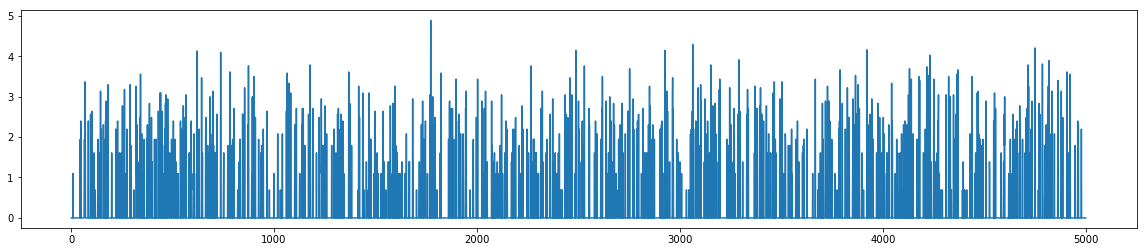

In [149]:
nval = 5000
plt.plot(data["id"].head(nval).values , data["feature 203"].head(nval).values)

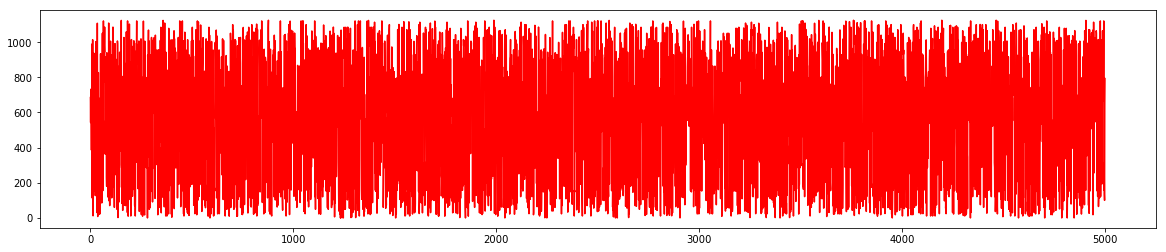

In [150]:
plt.plot(data["id"].head(nval).values , data["location"].head(nval).values , c="red")

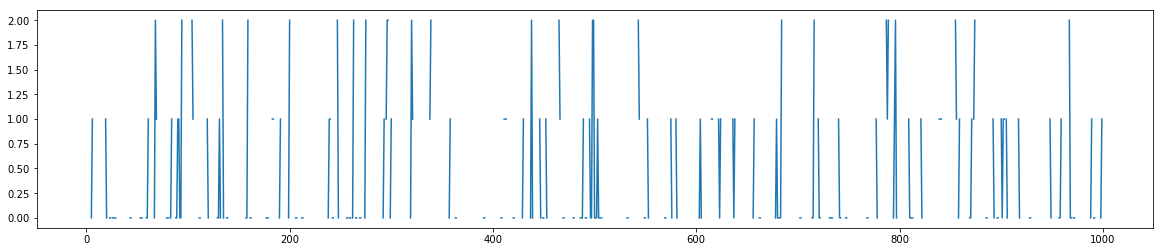

In [151]:
nval = 1000
plt.plot(data["id"].head(nval).values , data["fault_severity"].head(nval).values)

In [152]:
help(pd.crosstab)

Help on function crosstab in module pandas.core.reshape.pivot:

crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, dropna=True, normalize=False)
    Compute a simple cross-tabulation of two (or more) factors. By default
    computes a frequency table of the factors unless an array of values and an
    aggregation function are passed
    
    Parameters
    ----------
    index : array-like, Series, or list of arrays/Series
        Values to group by in the rows
    columns : array-like, Series, or list of arrays/Series
        Values to group by in the columns
    values : array-like, optional
        Array of values to aggregate according to the factors.
        Requires `aggfunc` be specified.
    aggfunc : function, optional
        If specified, requires `values` be specified as well
    rownames : sequence, default None
        If passed, must match number of row arrays passed
    colnames : sequence, default None
        If passed, mu

In [154]:
pd.crosstab(data["resource_type 8"] , data["fault_severity"])

fault_severity,0.0,1.0,2.0
resource_type 8,,,
0,2685,600,45
1,2099,1271,681


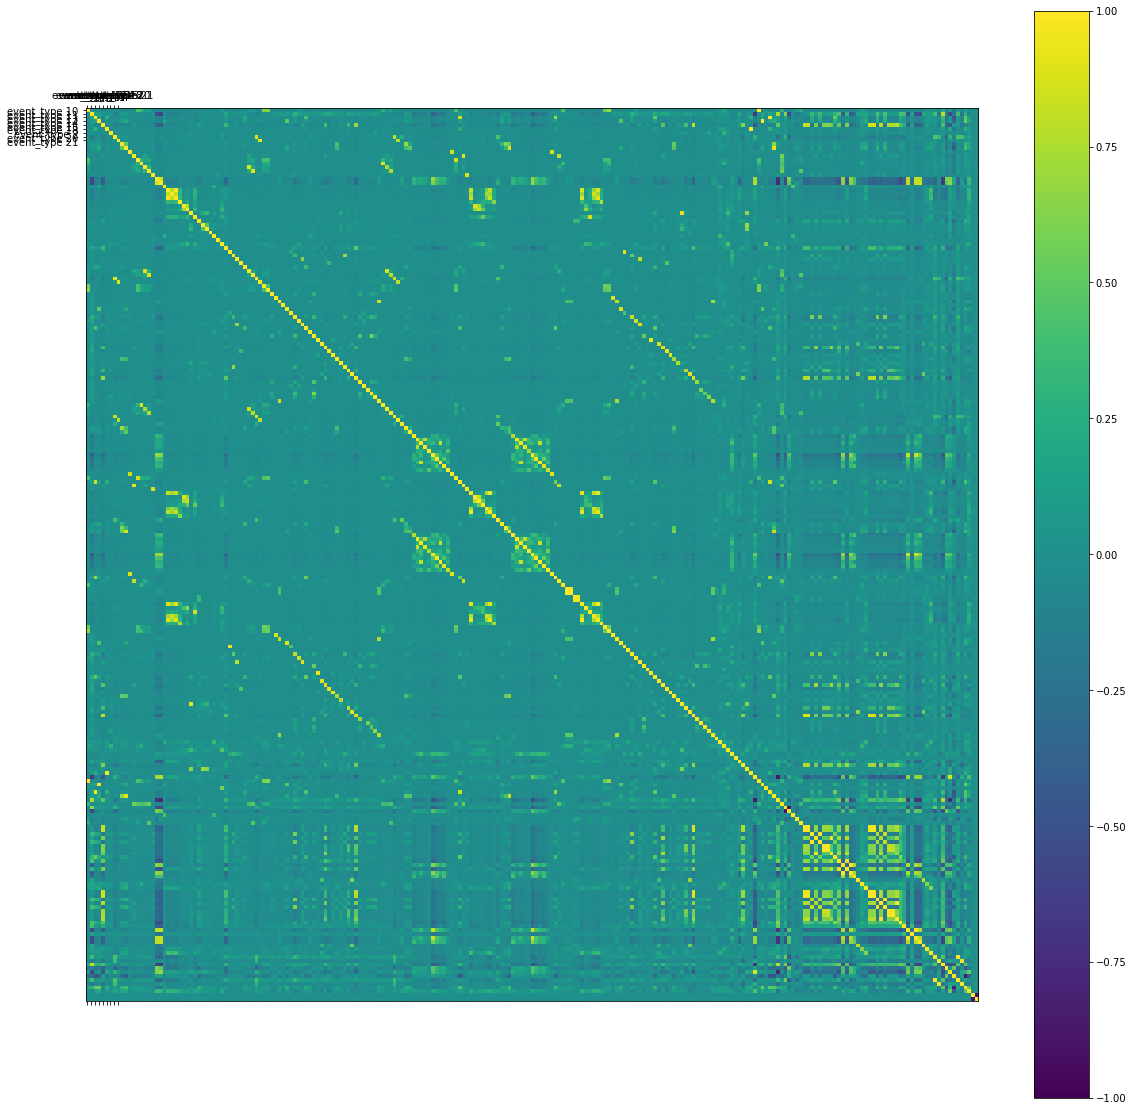

In [156]:
correlations = data.corr()  #计算变量之间的相关系数矩阵
# plot correlation matrix
fig = plt.figure(figsize=(20 , 20)) #调用figure创建一个绘图对象
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)  #绘制热力图，从-1到1
fig.colorbar(cax)  #将matshow生成热力图设置为颜色渐变条
ticks = np.arange(0,9,1) #生成0-9，步长为1
ax.set_xticks(ticks)  #生成刻度
ax.set_yticks(ticks)
names = data.columns
ax.set_xticklabels(names) #生成x轴标签
ax.set_yticklabels(names)
plt.show()

In [157]:
train = data.loc[data["source"] == "train"]
test = data.loc[data["source"] == "test"]

In [158]:
train.drop("source" , axis = 1 , inplace = True)
test.drop(["source" , "fault_severity"] , axis = 1 , inplace = True)

/Users/zhanghsiungwei/anaconda/envs/tensor/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/zhanghsiungwei/anaconda/envs/tensor/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [159]:
train.to_csv("data/train_modified_2.csv" , index = False)
test.to_csv("data/test_modified_2.csv" , index = False)